In [1]:
!TZ=US/Eastern date

Tue Jun 25 13:12:19 EDT 2024


In [2]:
!pwd
!echo $CONDA_PREFIX
!python -V

/ocean/projects/cis240078p/shared/analysis/D1
/opt/packages/anaconda3-2022.10
Python 3.9.13


In [3]:
import os
PD = os.environ['SHARED']

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
INPUT_FILE1 = PD + '/data/Maybridge_HitDiscover.smiles.unique.v2.csv'
INPUT_FILE2 = 'maybridge.predictions.by.D1.models.all.batch'

OUTPUT_FILE1 = 'maybridge.predictions.by.D1.models.all.csv'
OUTPUT_FILE2 = 'maybridge.predictions.by.D1.models.all.hist.png'

In [5]:
metadata = pd.read_csv(INPUT_FILE1, index_col=0)
metadata

,Code,SMILES
0,AC10018,FC1=CC=C(C=C1)C(C2=CC=C(F)C=C2)N3CCNCC3
1,AC12157,NC1=NC(N=CN2)=C2C(SC)=N1
2,AC13917,CN(C)CC1=CNC2=C1C=C(C=C2)OCC3=CC=CC=C3
3,AC27191,O=C(O)C1=CC=C(Br)O1
4,AC29806,O=C(O)C(N)CC1=CNC2=C1C=C(Br)C=C2
...,...,...
51770,S14814,O=[N+]([O-])C1=C(O/N=C(C)/OCC)C=CC([N+]([O-])=...
51771,S14839,O=C(N1OC2=CC=C([N+]([O-])=O)C([N+]([O-])=O)=C2...
51772,S14896,O=[N+]([O-])C1=CC=C2N=C(C3=CC=CC=C3)C(C4=CC=CC...
51773,SPB05721,CC(N1)=C(C(OCC)=O)C(/C=C/C2=CC=CC=C2)C(C(OCC)=...


In [6]:
!ls *.csv | wc

    128     128    6546


In [7]:
pred = []
for i in range(128):
    pred.append(pd.read_csv(INPUT_FILE2+str(i)+'.csv'))

In [8]:
len(pred), set([x.shape for x in pred])

(128, {(248, 7), (400, 7)})

In [9]:
pred = pd.concat(pred, axis=0).reset_index(drop=True)
pred

,Ligand,CNN_CNN,Daylight_AAC,Morgan_AAC,Morgan_CNN,MPNN_CNN,Transformer_CNN
0,AC10018,6.398362,2.823808,4.496290,4.491879,4.142949,5.639524
1,AC12157,4.286407,2.944750,4.567991,5.670137,4.152120,3.815788
2,AC13917,4.923468,3.389835,4.752714,5.311983,6.355803,4.957283
3,AC27191,4.051898,2.867304,3.667446,4.335749,4.846467,4.493408
4,AC29806,4.473889,3.162166,5.285881,5.392962,4.309135,3.995636
...,...,...,...,...,...,...,...
51043,S14814,7.302470,3.725910,4.363826,4.785840,4.804216,4.057171
51044,S14839,7.879395,3.369657,4.729897,4.775883,4.018338,3.264347
51045,S14896,6.634457,3.540349,4.080431,5.111834,4.583382,6.167119
51046,SPB05721,5.800920,5.166917,4.370079,5.050634,5.222699,4.468006


In [10]:
all([x == y for x,y in zip(pred.Ligand, metadata.Code)])

True

In [11]:
pred.drop(['Ligand'], axis=1).corr().round(3)

,CNN_CNN,Daylight_AAC,Morgan_AAC,Morgan_CNN,MPNN_CNN,Transformer_CNN
CNN_CNN,1.000,0.171,0.136,0.117,0.178,0.258
Daylight_AAC,0.171,1.000,0.215,0.188,0.199,0.121
Morgan_AAC,0.136,0.215,1.000,0.698,0.257,0.126
Morgan_CNN,0.117,0.188,0.698,1.000,0.207,0.127
MPNN_CNN,0.178,0.199,0.257,0.207,1.000,0.159
Transformer_CNN,0.258,0.121,0.126,0.127,0.159,1.000


In [12]:
pred.insert(pred.shape[1], column='Mean', value=pred.drop(['Ligand'], axis=1).mean(1))
pred

,Ligand,CNN_CNN,Daylight_AAC,Morgan_AAC,Morgan_CNN,MPNN_CNN,Transformer_CNN,Mean
0,AC10018,6.398362,2.823808,4.496290,4.491879,4.142949,5.639524,4.665469
1,AC12157,4.286407,2.944750,4.567991,5.670137,4.152120,3.815788,4.239532
2,AC13917,4.923468,3.389835,4.752714,5.311983,6.355803,4.957283,4.948514
3,AC27191,4.051898,2.867304,3.667446,4.335749,4.846467,4.493408,4.043712
4,AC29806,4.473889,3.162166,5.285881,5.392962,4.309135,3.995636,4.436612
...,...,...,...,...,...,...,...,...
51043,S14814,7.302470,3.725910,4.363826,4.785840,4.804216,4.057171,4.839906
51044,S14839,7.879395,3.369657,4.729897,4.775883,4.018338,3.264347,4.672920
51045,S14896,6.634457,3.540349,4.080431,5.111834,4.583382,6.167119,5.019595
51046,SPB05721,5.800920,5.166917,4.370079,5.050634,5.222699,4.468006,5.013209


In [13]:
pred.to_csv(OUTPUT_FILE1, index=None)

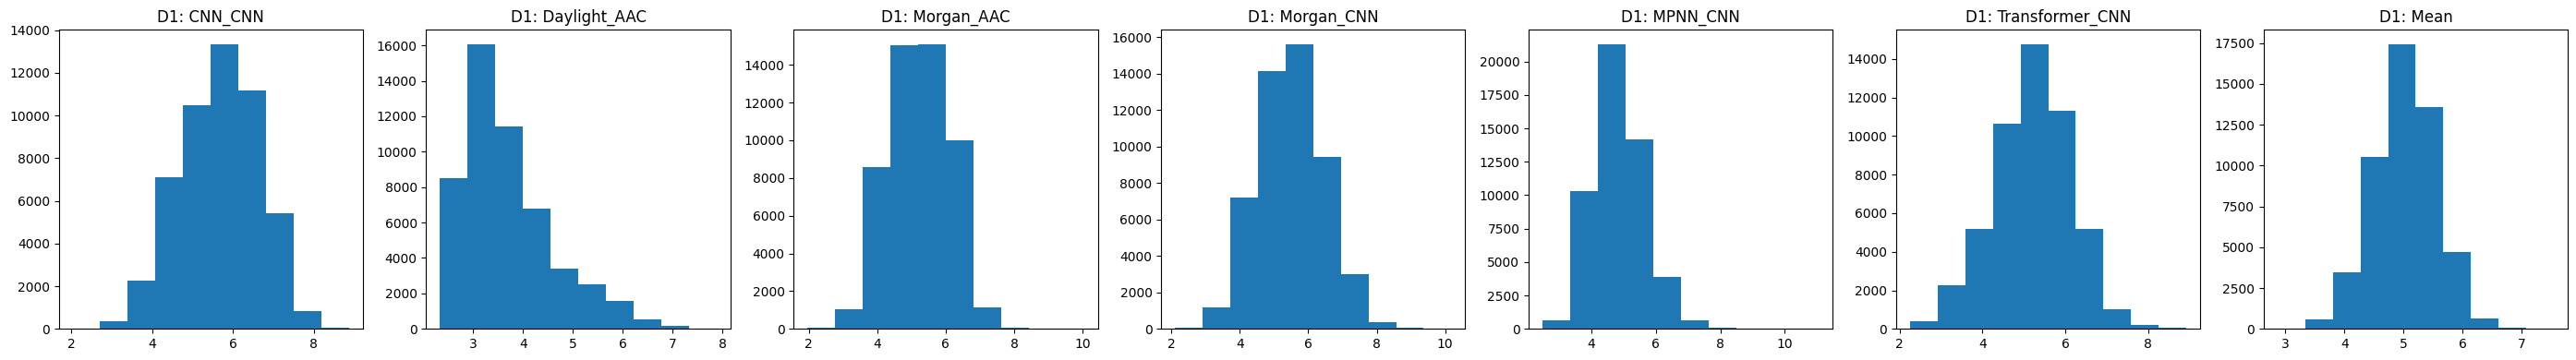

In [14]:
fig,ax = plt.subplots(1,7, figsize=(4*7,4))

[pred[x].hist(ax=ax[i], grid=False).set_title('D1: '+x) for i,x in enumerate(pred.columns[1:])]
fig.tight_layout()

fig.savefig(OUTPUT_FILE2)

In [15]:
!TZ=US/Eastern date

Tue Jun 25 13:12:23 EDT 2024
